In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sci
import scipy.optimize as opt
from scipy.interpolate import interp1d
np.set_printoptions(threshold=np.inf)

# Experiment 1: Linear polarization and Malus' Law

## 1.2: Measuring Intensity

In [38]:
time1, intensity1 = np.loadtxt("intensityvsdistance1.csv", delimiter = ",", skiprows = 1, usecols = (0, 1), unpack = True)
time2, intensity2 = np.loadtxt("intensityvsdistance2.csv", delimiter = ",", skiprows = 1, usecols = (0, 1), unpack = True)
time3, intensity3 = np.loadtxt("intensityvsdistance3.csv", delimiter = ",", skiprows = 1, usecols = (0, 1), unpack = True)

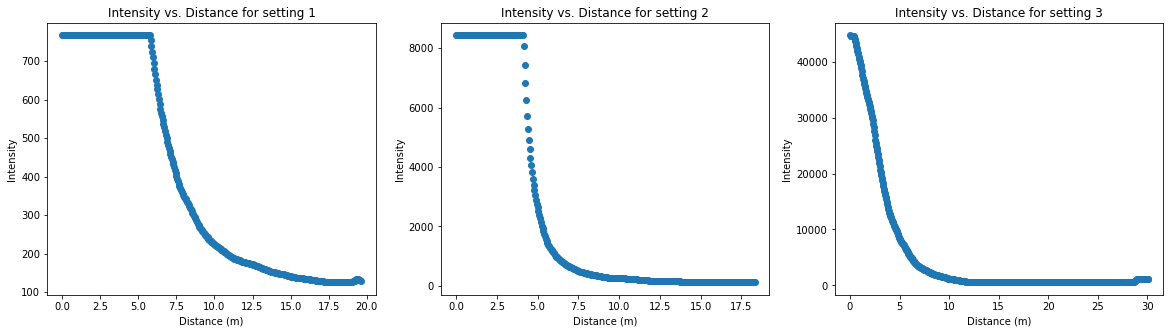

In [39]:
# plt.scatter(time1, intensity1, s = 0.4)
# plt.xlabel("Time (s)")
# plt.ylabel("Intensity")
# plt.title("Intensity vs. Distance using Setting 1")
# plt.show()

f2, axes = plt.subplots(1, 3, figsize = (20, 5))
plt.subplots_adjust(hspace = 10)

for i in range(3):
    axes[i].scatter(vars()["time" + str(i+1)], vars()["intensity" + str(i+1)])
    axes[i].set_title(f"Intensity vs. Distance for setting {i+1}")
    axes[i].set_ylabel("Intensity")
    axes[i].set_xlabel("Distance (m)")




In [40]:
def inverse(a, b, x):
    return a/((x+b)**2)

def fit(time, intensity, trend):
    opt1, cov = opt.curve_fit(trend, time, intensity)
    a, b = opt1
    da, db= np.sqrt(np.diag(cov))

    return a, da, b, db

[a3, da3, b3, db3] = fit(time3, intensity3, inverse)

print(f"{a3} \u00b1 {da3}")
print(f"{b3} \u00b1 {db3}")



-0.14434216156821456 ± 466848.20577345655
0.021152614457231107 ± 466848.20688095374


## 1.3 Malus' Law

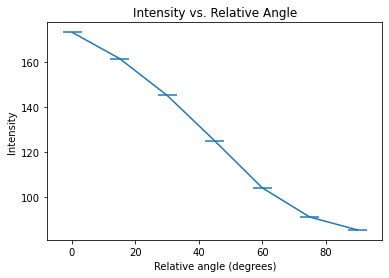

In [41]:
angles = np.linspace(0, 90, 7)
intensity = [173.3, 161.6, 145.2, 125.0, 104.1, 91.1, 85.4]

plt.errorbar(angles, intensity, yerr = 0.01, xerr = 3)
plt.xlabel("Relative angle (degrees)")
plt.title("Intensity vs. Relative Angle")
plt.ylabel("Intensity")
plt.show()



In [42]:
def malus(thetarel, I0, Ibg, theta0):
    return I0 * (np.cos((thetarel - theta0)*np.pi/180))**2 + Ibg


optimized, cov = opt.curve_fit(malus, angles, intensity)
maxintensity, Ibg, theta0 = optimized
dI0, dIbg, dtheta0 = np.sqrt(np.diag(cov))

print(f"Maximum intensity: {maxintensity} \u00b1 {dI0})")
print(f"Ibg offset: {Ibg} \u00b1 {dIbg}")
print(f"Angle offest: {theta0} \u00b1 {dtheta0}")

Maximum intensity: 85.31953387396842 ± 1.689348394090603)
Ibg offset: 86.48686905109633 ± 1.2429071551114734
Angle offest: -363.304979596639 ± 1.1017014827071856


In [45]:


def residuals(measured, theoretical, function, max, ibg, theta):
    r = 0
    for i in range(len(measured)):
        r += abs(function(theoretical[i], max, ibg, theta) - measured[i])**2
    return r

residual = residuals(intensity, angles, malus, maxintensity, Ibg, theta0)
print(residual)

print(f"Reduced: {residual/3}")
    

10.984840477767442
Reduced: 3.6616134925891473
